In [16]:
from sealion import neural_networks as nn 

NUM_CODINGS = 2
coding_layer = nn.layers.Dense(input_size=64, output_size=NUM_CODINGS, activation=nn.layers.ReLU())
first_layer = nn.layers.Dense(input_size=784, output_size=128, activation= nn.layers.ReLU())
second_layer = nn.layers.Dense(input_size=128, output_size=64, activation=nn.layers.ReLU())

end_layer_1 =  nn.layers.Dense(input_size=NUM_CODINGS, output_size=64, activation=nn.layers.ReLU())
end_layer_2 = nn.layers.Dense(input_size=64, output_size = 128, activation=nn.layers.ReLU())
end_layer_3 = nn.layers.Dense(input_size=128, output_size=784)
model = nn.models.NeuralNetwork([
    nn.layers.Flatten(), 
    first_layer, 
    second_layer,
    coding_layer, 
    end_layer_1,
    end_layer_2,
    end_layer_3
])


from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train  = X_train / 255.0
X_test = X_test / 255.0 

from sealion.utils import one_hot

y_train = one_hot(y_train, depth=10)
y_test = one_hot(y_test, depth=10)

model.finalize(optimizer= nn.optimizers.Adam(lr=0.0001), loss= nn.loss.MSE())

model.train(X_train, X_train.reshape(60000, 784), epochs = 200, batch_size=32)

Acc : -inf%: 100%|████████████████████████████████████████████████| 200/200 [05:38<00:00,  1.69s/it]


In [17]:
"""
NUM_CODINGS = 4
coding_layer = nn.layers.Dense(input_size=64, output_size=NUM_CODINGS, activation=nn.layers.ReLU())
first_layer = nn.layers.Dense(input_size=784, output_size=128, activation= nn.layers.ReLU())
second_layer = nn.layers.Dense(input_size=128, output_size=64, activation=nn.layers.ReLU())

end_layer_1 =  nn.layers.Dense(input_size=NUM_CODINGS, output_size=64, activation=nn.layers.ReLU())
end_layer_2 = nn.layers.Dense(input_size=64, output_size = 128, activation=nn.layers.ReLU())
end_layer_3 = nn.layers.Dense(input_size=128, output_size=784)

"""

import numpy as np
def get_coding_from_image(image):
    image = np.array(image)
    relu_layer = nn.layers.ReLU()
    output = relu_layer.forward(first_layer.forward(image.reshape(image.shape[0], 784)))
    output = relu_layer.forward(second_layer.forward(output))
    return relu_layer.forward(coding_layer.forward(output))


def get_image_from_coding(coding): 
    relu_layer = nn.layers.ReLU()
    output = relu_layer.forward(end_layer_1.forward(coding))
    output = relu_layer.forward(end_layer_2.forward(output))
    output = end_layer_3.forward(output)
    return relu_layer.forward(output).reshape(28, 28)


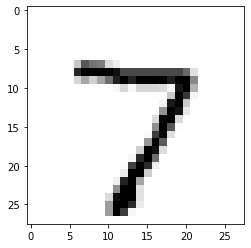

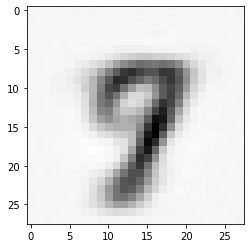

[[11.79299211 16.35252485]]


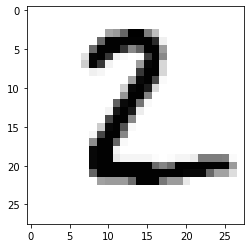

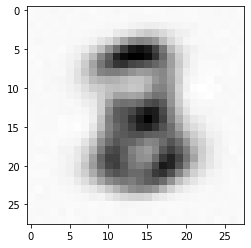

[[ 6.70069484 17.81676704]]


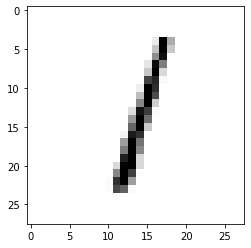

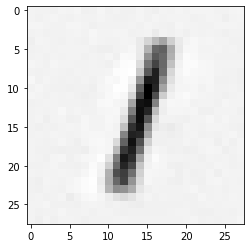

[[16.52147398  9.05894729]]


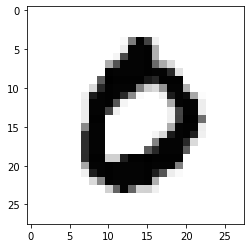

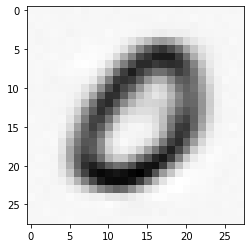

[[ 4.38970955 24.63640792]]


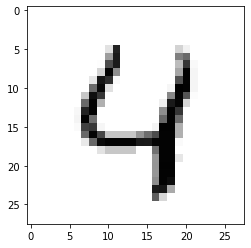

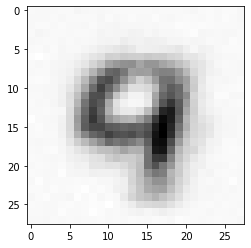

[[10.27282914 18.68197649]]


In [18]:
# just get an idea of what we have 
import matplotlib.pyplot as plt
from IPython.display import clear_output
for index in range(5): 

    plt.imshow(X_test[index].reshape(28, 28), cmap="Greys")
    plt.show()

    plt.imshow(model.predict([X_test[index]]).reshape(28, 28) * 255.0, cmap="Greys")
    plt.show()

    print(get_coding_from_image([X_test[index]]))

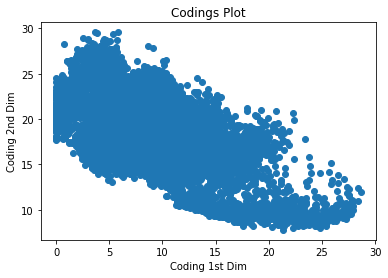

In [21]:
CODINGS = get_coding_from_image(X_test)
plt.scatter(CODINGS[:, 0], CODINGS[:, 1])
plt.title("Codings Plot")
plt.xlabel("Coding 1st Dim")
plt.ylabel("Coding 2nd Dim")
plt.show()

In [6]:
import numpy as np
import cv2
import subprocess as sp 
import imageio

WORKING_CODING = np.array([0, 5])

IMAGES = []
for i in range(200): 
    WORKING_CODING[0] = 0.01 * i 
    WORKING_CODING[1] = 0.5 * WORKING_CODING[0] 
    image = get_image_from_coding(WORKING_CODING).reshape(28, 28)
    
    IMAGES.append(image)

    #plt.imshow(image.reshape(28, 28), cmap="Greys")
    #plt.show()

print(image.shape)

imageio.mimsave("output_7.mov", IMAGES, fps=60)

Lossy conversion from float64 to uint8. Range [0.0, 1.7709059814052046]. Convert image to uint8 prior to saving to suppress this warning.


(28, 28)


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (28, 28) to (32, 32) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
Lossy conversion from float64 to uint8. Range [0.0, 1.7709059814052046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 1.7709059814052046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 1.7709059814052046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 1.7709059814052046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 1.7709059814052046]. Convert image to uint8 prior to saving to suppress this war